**EDA 2 - Merged Dataset**

In [116]:
pip install pyarrow

     |████████████████████████████████| 24.6 MB 3.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [118]:
import pandas as pd 
import os
import numpy as np
import matplotlib.pyplot as plt
import demoji
import seaborn as sns
import nltk
from datetime import date
import regex as re
import pyarrow

In [3]:
os.chdir('/Users/katymatulay/Documents/Drexel - Grad School/07 Fall 2022/DSCI591/Capstone/data')

In [5]:
df.shape

(2610052, 17)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2610052 entries, 0 to 493185
Data columns (total 17 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   external_author_id  object
 1   author              object
 2   content             object
 3   region              object
 4   language            object
 5   publish_date        object
 6   following           int64 
 7   followers           int64 
 8   updates             int64 
 9   is_retweet          int64 
 10  account_category    object
 11  tweet_id            object
 12  full_url            object
 13  data_source         object
 14  has_URL             int64 
 15  emoji_text          object
 16  emoji_count         int64 
dtypes: int64(6), object(11)
memory usage: 358.4+ MB


In [6]:
df.head()

,external_author_id,author,content,region,language,publish_date,following,followers,updates,is_retweet,account_category,tweet_id,full_url,data_source,has_URL,emoji_text,emoji_count
0,906000000000000000,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,2017-10-01 19:58:00,1052,9636,253,0,RightTroll,914580356430536707,https://twitter.com/10_gop/status/914580356430...,Troll,1,[],0
1,906000000000000000,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,2017-10-01 22:43:00,1054,9637,254,0,RightTroll,914621840496189440,https://twitter.com/damienwoody/status/9145685...,Troll,1,[],0
2,906000000000000000,10_GOP,Daughter of fallen Navy Sailor delivers powerf...,Unknown,English,2017-10-01 22:50:00,1054,9637,255,1,RightTroll,914623490375979008,https://twitter.com/10_gop/status/913231923715...,Troll,1,[],0
3,906000000000000000,10_GOP,JUST IN: President Trump dedicates Presidents ...,Unknown,English,2017-10-01 23:52:00,1062,9642,256,0,RightTroll,914639143690555392,https://twitter.com/10_gop/status/914639143690...,Troll,1,[],0
4,906000000000000000,10_GOP,"19,000 RESPECTING our National Anthem! #StandF...",Unknown,English,2017-10-01 02:13:00,1050,9645,246,1,RightTroll,914312219952861184,https://twitter.com/realDonaldTrump/status/914...,Troll,1,[flag: United States],1


In [7]:
df.isnull().sum()

external_author_id         0
author                     0
content                    0
region                 52767
language                   0
publish_date               0
following                  0
followers                  0
updates                    0
is_retweet                 0
account_category           0
tweet_id                   0
full_url              868926
data_source                0
has_URL                    0
emoji_text                 0
emoji_count                0
dtype: int64

Binary Numerical Columns:
- Is_reweet
- has_URL

Categorical Columns:
- Language
- Region
- Author
- Account_category
- Data_source

Continuous Numerical Columns:
- Following
- Followers
- Updates
- Emoji Count
- Russ_Letter_count

String Object Columns:
- Content
- Emoji_text
- Tokens

### Binary Numerical Columns

In [50]:
df['is_retweet'].value_counts()

0    1673960
1     936092
Name: is_retweet, dtype: int64

<AxesSubplot:>

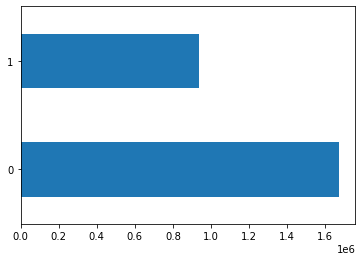

In [11]:
df['is_retweet'].value_counts().plot(kind='barh')

<AxesSubplot:>

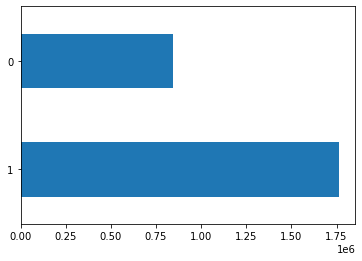

In [18]:
df['has_URL'].value_counts().plot(kind='barh')

### Categorical Columns

In [52]:
df['data_source'].value_counts()

Troll            2116866
Verified_User     493186
Name: data_source, dtype: int64

<AxesSubplot:>

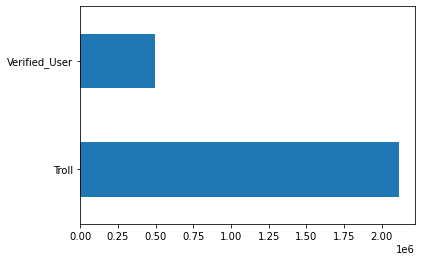

In [15]:
df['data_source'].value_counts().plot(kind='barh')

In [21]:
df['region'].value_counts()

United States                     1899067
Unknown                            240953
Washington, DC                      89024
New York, NY                        58849
New York and the World              26248
Washington, D.C.                    20831
Boston, MA                          19926
Pale Blue Dot                       17497
United Kingdom                      16663
New York City                       16584
Around the world                    14474
USA TODAY HQ, McLean, Va.           14056
The Pentagon, Washington, D.C.      12492
Global                              11906
London, UK                          10783
Atlanta, GA                         10657
Reston, VA                          10546
Australia                            9738
More than 60 countries               9515
Alaska                               8566
Azerbaijan                           6911
Alexandria, VA                       6093
Silver Spring, MD                    5231
United States of America          

In [22]:
len(df['region'].value_counts())

54

<AxesSubplot:>

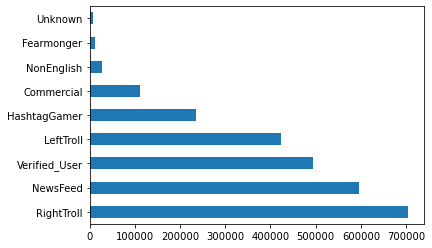

In [32]:
df['account_category'].value_counts().plot(kind='barh')

In [24]:
verified_filter = df['account_category']=='Verified_User'

In [25]:
Troll_filter = df['data_source']=='Troll'

In [227]:
df.where(verified_filter).count()

external_author_id    493186
author                493186
content               493186
region                441555
language              493186
publish_date          493186
following             493186
followers             493186
updates               493186
is_retweet            493186
account_category      493186
tweet_id              493186
full_url              383066
data_source           493186
has_URL               493186
emoji_text            493186
emoji_count           493186
following_ratio       493186
RUS_lett_count        493186
dtype: int64

In [228]:
df.where(Troll_filter).count()

external_author_id    2116866
author                2116866
content               2116866
region                2115730
language              2116866
publish_date          2116866
following             2116866
followers             2116866
updates               2116866
is_retweet            2116866
account_category      2116866
tweet_id              2116866
full_url              1358060
data_source           2116866
has_URL               2116866
emoji_text            2116866
emoji_count           2116866
following_ratio       2116866
RUS_lett_count        2116866
dtype: int64

#### Comparing Regions only found in Troll tweets

In [61]:
top10_troll_loc = df.where(Troll_filter).groupby('region')['content'].count().nlargest(10)
troll_loc = df.where(Troll_filter).groupby('region')['content'].count()
troll_loc = troll_loc.to_dict()
top10_troll_loc

region
United States         1844450
Unknown                240953
United Kingdom          16663
Azerbaijan               6911
Germany                  1285
Russian Federation       1145
Italy                    1125
Canada                    600
Afghanistan               461
Belarus                   449
Name: content, dtype: int64

In [62]:
top10_verified_loc = df.where(verified_filter).groupby('region')['content'].count().nlargest(10)
ver_loc = df.where(verified_filter).groupby('region')['content'].count()
ver_loc = ver_loc.to_dict()
top10_verified_loc

region
Washington, DC               89024
New York, NY                 58849
United States                54617
New York and the World       26248
Washington, D.C.             20831
Boston, MA                   19926
Pale Blue Dot                17497
New York City                16584
Around the world             14474
USA TODAY HQ, McLean, Va.    14056
Name: content, dtype: int64

In [63]:
#regions only found in Trolls tweets
set(troll_loc)-set(ver_loc)

{'Afghanistan',
 'Azerbaijan',
 'Belarus',
 'Canada',
 'Czech Republic',
 'Denmark',
 'Egypt',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Hong Kong',
 'Iran, Islamic Republic of',
 'Iraq',
 'Israel',
 'Italy',
 'Latvia',
 'Malaysia',
 'Mexico',
 'Russian Federation',
 'Serbia',
 'Spain',
 'Sweden',
 'Switzerland',
 'Ukraine',
 'United Arab Emirates',
 'United Kingdom',
 'Unknown'}

In [65]:
#Who's location is more than 60 countries?
df[df['region']=='More than 60 countries']['author'].unique()

array(['PeaceCorps'], dtype=object)

In [79]:
#Who's location is Around the World?
df[df['region']=='Around the world']['author'].unique()

array(['Reuters'], dtype=object)

<AxesSubplot:title={'center':'top 10 accounts by region and data source'}, ylabel='region,data_source,author'>

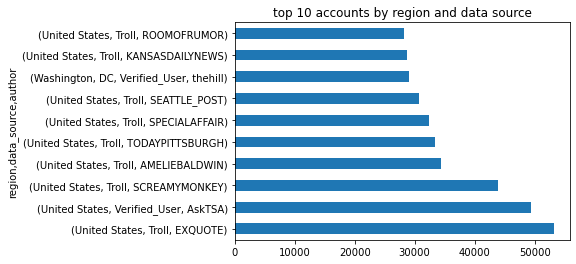

In [89]:
#Show top 10 accounts by region and data source
df.groupby(['region','data_source'])['author'].value_counts().nlargest(10).plot(kind='barh',
                                                                    title='top 10 accounts by region and data source')

In [31]:
#Who's location is Pale Blue Dot?
df[df['region']=='Pale Blue Dot']['author'].unique()

array(['NASA'], dtype=object)

<AxesSubplot:ylabel='author'>

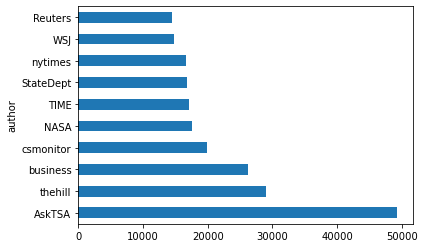

In [66]:
real_authors=df.where(verified_filter).groupby('author')['content'].count().nlargest(10)
real_authors.plot(kind='barh')

<AxesSubplot:ylabel='author'>

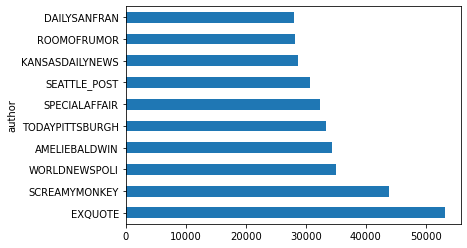

In [67]:
troll_authors =df.where(Troll_filter).groupby('author')['content'].count().nlargest(10)
troll_authors.plot(kind='barh')

### Numerical Continuous Columns

In [97]:
df['emoji_count'].value_counts().sort_index()

0      2548431
1        39794
2        10033
3         5575
4         2621
5         1286
6          740
7          349
8          261
9          190
10         134
11          88
12         118
13          63
14          39
15          41
16          52
17          79
18          14
19           6
20          14
21           9
22          11
23           6
24          14
25           9
26           9
27           3
28           2
29           5
30           6
31           3
32           3
33           1
34           5
35           2
36           1
37           2
38           1
42           1
43           1
44           2
45           3
47           1
49           1
50           1
56           1
57          14
61           1
72           1
85           1
107          1
108          1
116          1
118          1
Name: emoji_count, dtype: int64

<AxesSubplot:>

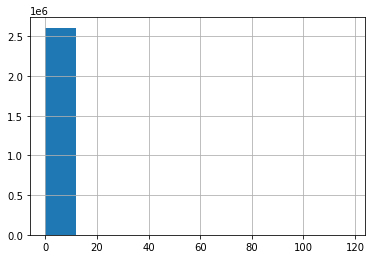

In [95]:
df['emoji_count'].hist()

In [97]:
df['emoji_count'].mean()

0.04487113666700893

<AxesSubplot:title={'center':'top 10 accounts by emoji count and data source'}, ylabel='author,data_source'>

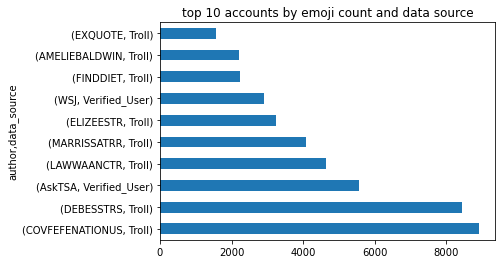

In [115]:
df.groupby(['author','data_source'])['emoji_count'].sum().nlargest(10).plot(kind='barh',
                                                                           title='top 10 accounts by emoji count and data source')
#df.groupby(['region','data_source'])['author'].value_counts().nlargest(10).plot(kind='barh',
 #                                                                   title='top 10 accounts by region and data source')

In [100]:
df[df['emoji_count']>1].head()

,external_author_id,author,content,region,language,publish_date,following,followers,updates,is_retweet,account_category,tweet_id,full_url,data_source,has_URL,emoji_text,emoji_count
6,906000000000000000,10_GOP,🐝🐝🐝 https://t.co/MorL3AQW0z,Unknown,English,2017-10-01 02:48:00,1050,9644,248,1,RightTroll,914321156466933760,https://twitter.com/Cernovich/status/914314644...,Troll,1,"[honeybee, honeybee, honeybee]",3
16,906000000000000000,10_GOP,First lady Melania Trump visits infant opioid ...,Unknown,English,2017-10-10 23:42:00,1068,10328,304,0,RightTroll,917898105365909504,https://twitter.com/10_gop/status/917898105365...,Troll,1,"[red heart, red heart]",2
39,906000000000000000,10_GOP,A cute 10 yo girl had a Trump dress on. Hannit...,Unknown,English,2017-10-12 03:02:00,1072,10366,317,0,RightTroll,918310998913798144,https://twitter.com/10_gop/status/918310998913...,Troll,1,"[red heart, red heart]",2
74,906000000000000000,10_GOP,'@Cernovich @KFILE JOURNALISM 😱😱',Unknown,English,2017-10-02 22:37:00,1066,9721,269,0,RightTroll,914982688028798976,NaN,Troll,0,"[face screaming in fear, face screaming in fear]",2
79,906000000000000000,10_GOP,The truth about Puerto Rico 🇵🇷 &amp; it's not ...,Unknown,English,2017-10-02 02:42:00,1064,9651,258,1,RightTroll,914681854858600449,https://twitter.com/ExDemLatina/status/9146187...,Troll,1,"[flag: Puerto Rico, diamond suit, diamond suit]",3


In [80]:
start_EXQUOTE= df[df['author']=='EXQUOTE']['publish_date'].min()
end_EXQUOTE = df[df['author']=='EXQUOTE']['publish_date'].max()

In [85]:
start_EXQUOTE
mm/dd/yyyy hh:mm

'7/10/2015 0:00'

In [103]:
df['publish_date'].head()

0    2017-10-01 19:58:00
1    2017-10-01 22:43:00
2    2017-10-01 22:50:00
3    2017-10-01 23:52:00
4    2017-10-01 02:13:00
Name: publish_date, dtype: object

**Derive New Feature: Following Ratio**

In [107]:
df['followers'].min()+1

1

In [108]:
#Add 1 to each number to account for accounts with 0 followers
df['following_ratio']=(df['following']+1)/(df['followers']+1)

<AxesSubplot:>

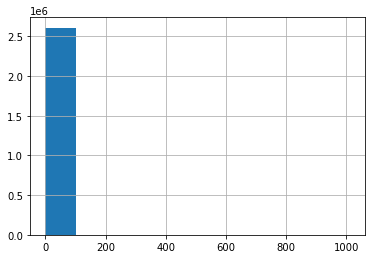

In [110]:
df['following_ratio'].hist()

In [148]:
df.loc[df['following_ratio']>700, ['author','following_ratio','account_category']]

,author,following_ratio,account_category
90144,AMBERLINETR,965.0,RightTroll
90145,AMBERLINETR,965.0,RightTroll
90146,AMBERLINETR,965.0,RightTroll
90147,AMBERLINETR,965.0,RightTroll
90148,AMBERLINETR,965.0,RightTroll
90149,AMBERLINETR,965.0,RightTroll
90150,AMBERLINETR,965.0,RightTroll
90151,AMBERLINETR,965.0,RightTroll
90152,AMBERLINETR,965.0,RightTroll
90153,AMBERLINETR,965.0,RightTroll


In [138]:
df.where(Troll_filter).groupby('author')['following_ratio'].mean().nlargest(5)

author
RIKKIRI1          186.666667
TEDCHOCKHOLDER    112.499512
MUPU26            109.666667
BERNIEDDDD         88.000000
CTHUNO             72.333333
Name: following_ratio, dtype: float64

In [149]:
df.where(verified_filter).groupby('author')['following_ratio'].mean().nlargest(5)

author
TheIJR           0.063315
csmonitor        0.025930
NPR              0.007483
RealClearNews    0.005626
BarackObama      0.004346
Name: following_ratio, dtype: float64

In [153]:
df.where(verified_filter).loc[df['following_ratio']>1, ['author','following_ratio','account_category']]

,author,following_ratio,account_category
343,NaN,NaN,NaN
344,NaN,NaN,NaN
345,NaN,NaN,NaN
346,NaN,NaN,NaN
347,NaN,NaN,NaN
...,...,...,...
2931706,NaN,NaN,NaN
2931707,NaN,NaN,NaN
2931708,NaN,NaN,NaN
2931709,NaN,NaN,NaN


<AxesSubplot:xlabel='author'>

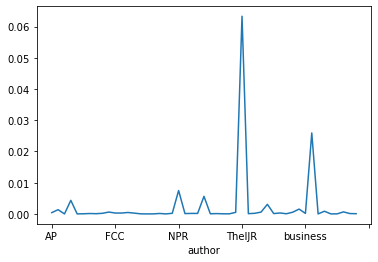

In [156]:
df.where(verified_filter).groupby('author')['following_ratio'].max().plot()

<AxesSubplot:xlabel='author'>

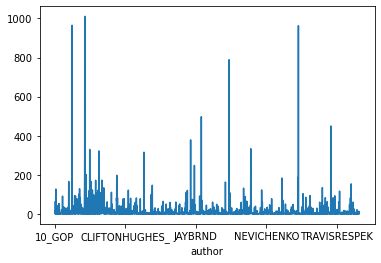

In [158]:
df.where(Troll_filter).groupby('author')['following_ratio'].max().plot()

In [159]:
df.where(Troll_filter).following_ratio.max()

1011.0

In [160]:
df.where(verified_filter).following_ratio.max()

0.06331618519984171

In [161]:
df.where(Troll_filter).following.max()

76210.0

In [162]:
df.where(verified_filter).following.max()

580341.0

In [163]:
df.where(verified_filter).followers.max()

133524146.0

In [164]:
df.where(Troll_filter).followers.max()

206686.0

### Emoji Counts

In [120]:
df.where(Troll_filter).emoji_count.mean()

0.04842677807664727

In [168]:
df.where(verified_filter).emoji_count.mean()

0.029609518518368322

In [170]:
df.where(Troll_filter).emoji_count.max()

118.0

In [171]:
df.where(verified_filter).emoji_count.max()

22.0

In [218]:
df.loc[df['emoji_count']==22, ['author']]

,author
24056,ACEJINEV
109922,AMELIEBALDWIN
908025,WILLISBONNERR
1176421,BRENTMCCLURE275
1707493,ELINSSTR
2124946,JADONHUTCHINSON
2134589,JANI_S_JAC
2470925,MARRISSATRR
2580610,MRCLYDEPRATT
2891874,PEYTONCASHOUT


In [224]:
df.loc[123125]

,external_author_id,author,content,region,language,publish_date,following,followers,updates,is_retweet,account_category,tweet_id,full_url,data_source,has_URL,emoji_text,emoji_count,following_ratio,RUS_lett_count
123125,1679279490,AMELIEBALDWIN,'@foxandfriends We also need legislation halt...,United States,English,2016-09-16 17:10:00,1481,2024,4365,1,RightTroll,776830590364573696,NaN,Troll,0,[],0,0.731852,0
123125,16669075,fema,RT @TrooperBob_SCHP: Your option with the snow...,United States,en,2016-01-23 14:27:39+00:00,722,840940,209,1,Verified_User,690903726933053440,NaN,Verified_User,0,"[snowflake, sport utility vehicle, oncoming po...",22,0.000860,0


Capture most frequently used emojis overall

In [166]:
def capture_emojis_list(series_emojis):
    t=[]
    for i in series_emojis:
        if len(i) >1:
            t.append(i)
    return t

def flatten_list(_2d_list):
    flat_list = []
    # Iterate through the outer list
    for element in _2d_list:
        if type(element) is list:
            # If the element is of type list, iterate through the sublist
            for item in element:
                flat_list.append(item)
        else:
            flat_list.append(element)
    return flat_list

def print_emoji_top_10(emoji_flat_list):
    flat_array = np.array(emoji_flat_list)
    return pd.value_counts(flat_array).nlargest(10).plot(kind='barh',title='top 10 most frequently used emojis')

<AxesSubplot:title={'center':'top 10 most frequently used emojis'}>

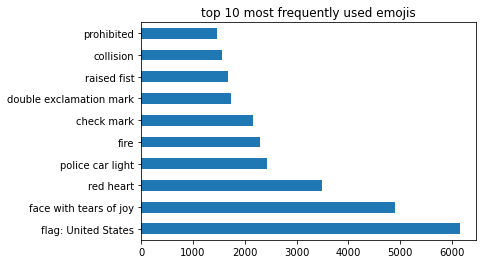

In [167]:
list_emojis = capture_emojis_list(df['emoji_text'])
flat_list = flatten_list(list_emojis)
print_emoji_top_10(flat_list)

Get Non-Troll Emojis

In [176]:
non_troll_emojis_series = df[df['data_source']!='Troll']['emoji_text']

<AxesSubplot:title={'center':'top 10 most frequently used emojis'}>

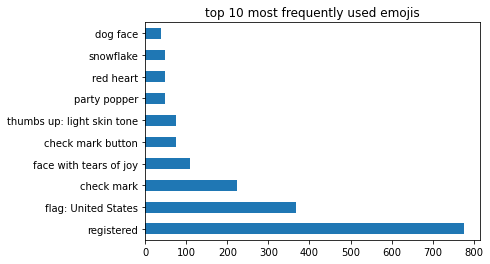

In [177]:
list_emojis2 = capture_emojis_list(non_troll_emojis_series)
flat_list2 = flatten_list(list_emojis2)
print_emoji_top_10(flat_list2)

### Examining Russian alphabet used in English Tweets

In [165]:
print('Unicode codes for English letters run from ' + str(ord('A')) + ' to ' + str(ord('z')) + '.')
print('Unicode codes for Russian letters run from ' + str(ord('А')) + ' to ' + str(ord('я')) + '.')

Unicode codes for English letters run from 65 to 122.
Unicode codes for Russian letters run from 1040 to 1103.


In [173]:
#test
r_p2 = df.content[df.content.str.contains('Marco Rubio: from Republican savior to prophet', na=False)].values[0]
print(re.findall('[А-Яа-я]', r_p2))
print(r_p2)

['в']
Marco Rubio: from Republican savior to prophet of gloom в and back again #StopTheGOP  #GOPDebate


In [174]:
#create a column with a count of Russian letters (if any are used)
df['RUS_lett_count'] = df.content.apply(lambda x: len(re.findall('[\u0400-\u04FF]', x)))

In [176]:
#capture a list of accounts and account_category using Russian Letters
acc_with_ru = (df[['author', 'RUS_lett_count','account_category']]).groupby(by='author').max()
print('The number of accounts using Russian letters is')
print(np.sum(acc_with_ru.RUS_lett_count!=0))

The number of accounts using Russian letters is
265


In [185]:
test = df.iloc[df['RUS_lett_count'].max()]['content']
test

'No sir @10_gop We will not be silenced.Keep speaking the Truth Patriot👍 https://t.co/6XbSHEDEHB'

In [189]:
re.findall('[\u0400-\u04FF]',test)

[]

In [190]:
re.findall('[\u0400-\u04FF]',r_p2)

['в']

In [201]:
df.loc[df['RUS_lett_count']>50, ['author','content','language','RUS_lett_count','account_category']]


,author,content,language,RUS_lett_count,account_category
205991,ARGENTINACATLE1,Сонгогчидтойгоо уулзалдахын тулд уртын харайлт...,English,75,LeftTroll
221725,ARM_2_ALAN,На границе #Украина и #Словакия Реверс поставк...,English,99,RightTroll
296457,RAJAMANICKAMDA2,Нөгөө бичлэг задруулсан залуу @dropmires -с 40...,English,81,NonEnglish
1214649,BYDRBRE_,На Сахалине День снега не удалось отметить из-...,English,109,NonEnglish
1214823,BYDRBRE_,Волк Забивака стал талисманом чемпионата мира ...,English,53,NonEnglish
...,...,...,...,...,...
2674469,NIK__ANGELA,Что пишут о катастрофе MH17 в википедиях на ра...,English,82,NonEnglish
2674490,NIK__ANGELA,Медведев назначил Александра Потемкина торгпре...,English,55,NonEnglish
2674646,NIK__ANGELA,"Анапа Геленджик, Сочи, Адлер и Туапсе мои люб...",English,59,NonEnglish
2674681,NIK__ANGELA,Путин подписал закон о подготовке госимущества...,English,54,NonEnglish


In [203]:
df.loc[df['RUS_lett_count']>50, ['account_category']]

,account_category
205991,LeftTroll
221725,RightTroll
296457,NonEnglish
1214649,NonEnglish
1214823,NonEnglish
...,...
2674469,NonEnglish
2674490,NonEnglish
2674646,NonEnglish
2674681,NonEnglish


In [119]:
df[df['RUS_lett_count']>0]['data_source'].value_counts()

KeyError: 'RUS_lett_count'

In [240]:
df.columns

Index(['external_author_id', 'author', 'content', 'region', 'language',
       'publish_date', 'following', 'followers', 'updates', 'is_retweet',
       'account_category', 'tweet_id', 'full_url', 'data_source', 'has_URL',
       'emoji_text', 'emoji_count', 'following_ratio', 'RUS_lett_count'],
      dtype='object')